In [ ]:
from scipy import signal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel (r'/content/drive/My Drive/vibration_data/lbba_real_denoise.xlsx')

#df = pd.read_excel (r'/content/drive/My Drive/vibration_data/stftdenoised.xlsx')

print (df)

          lbba_e   Unnamed: 1  ...  Unnamed: 13  Unnamed: 14
0       original         soft  ...      garrote          erf
1    -0.00017017  0.000179096  ...  1.29327e-05 -1.95499e-06
2    -0.00017017  0.000216536  ...  1.61092e-05  -1.2608e-07
3    -0.00017017  0.000254452  ...  1.93344e-05  1.73002e-06
4    -0.00017017    0.0002927  ...  2.25986e-05  3.60759e-06
...          ...          ...  ...          ...          ...
5996 -0.00017017  0.000204902  ... -0.000253507 -0.000251817
5997 -0.00017017  0.000270858  ... -0.000260708 -0.000259421
5998 -0.00017017  0.000354036  ... -0.000256848 -0.000256355
5999  0.00082984  0.000413503  ... -0.000257519 -0.000257453
6000  0.00082984  0.000447024  ... -0.000262938 -0.000262664

[6001 rows x 15 columns]


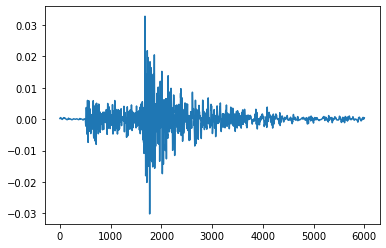

In [ ]:
#x=df.iloc[[1,6000],1]
x=df.iloc[:,4]
x=x[1:] 
xs=x
plt.plot(x)



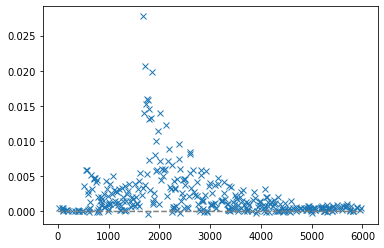

In [ ]:
peaks, _ = find_peaks(x, height=0)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [ ]:
peakind = signal.find_peaks_cwt(xs,np.arange(1,10))
inxs=-xs
peakind2= signal.find_peaks_cwt(inxs,np.arange(1,10))
peakind


array([   7,   10,   74,   96,  111,  118,  150,  171,  201,  223,  265,
        287,  312,  330,  381,  395,  521,  544,  569,  588,  595,  623,
        657,  681,  704,  723,  724,  749,  766,  788,  802,  826,  848,
        849,  867,  872,  876,  902,  915,  924,  943,  969,  983,  999,
       1003, 1014, 1037, 1057, 1081, 1102, 1122, 1147, 1164, 1179, 1186,
       1191, 1206, 1223, 1240, 1263, 1281, 1307, 1329, 1343, 1348, 1369,
       1386, 1411, 1429, 1434, 1450, 1489, 1510, 1535, 1552, 1557, 1562,
       1576, 1625, 1654, 1678, 1686, 1700, 1722, 1749, 1776, 1796, 1797,
       1816, 1839, 1860, 1877, 1895, 1904, 1912, 1925, 1938, 1958, 1978,
       2010, 2032, 2053, 2071, 2089, 2108, 2133, 2152, 2165, 2166, 2190,
       2215, 2216, 2231, 2240, 2243, 2256, 2281, 2285, 2286, 2304, 2315,
       2323, 2344, 2383, 2409, 2428, 2450, 2467, 2479, 2491, 2514, 2541,
       2554, 2568, 2579, 2611, 2633, 2648, 2672, 2711, 2713, 2740, 2773,
       2777, 2797, 2817, 2838, 2859, 2880, 2903, 29

In [ ]:
cwtpeaks=xs[peakind]
incwtpeaks=inxs[peakind2]
cwtpeaks = np.asarray(cwtpeaks)
incwtpeaks = np.asarray(incwtpeaks)
cwtpeaks
#max(cwtpeaks)

array([0.000408887482696553, 0.000465133803806904, 0.000456082372690495,
       0.000436756781080052, 0.000148587899040318, 7.65807111443283e-05,
       -0.000107994206770699, 0.000279302147278129, 0.000116979942476113,
       -0.00010998363585044, 9.50129042025543e-05, 3.29159744738927e-05,
       -7.90100629857122e-06, 9.73628009689162e-05, -5.87410970053395e-05,
       0.000197354414272418, 0.00370436820831516, 0.00593173520919369,
       0.00586535282655503, 0.00251039997139554, 0.00151742173210701,
       0.000803049518959309, 0.00517390740826006, 0.00392975454715923,
       0.0045617918304414, 0.00469998022192712, 0.00506721528469765,
       0.00334860022552287, 0.00443752687986589, 0.00171208221202239,
       -0.000444836025141165, 0.00139530634226897, 0.00211700329222778,
       0.00219469839833132, 0.00172830267096248, -0.000765104758918435,
       0.00218654220884365, 0.000536816106235841, 0.00303390128777122,
       0.00105904089560991, 0.00498763440584664, 0.003241088002069

In [ ]:
thresh=0.25
acth=thresh*max(cwtpeaks)
count1=np.sum(cwtpeaks>acth) 
count2=np.sum(incwtpeaks>acth)
count=count1+count2
count

36

In [ ]:
type(cwtpeaks)

numpy.ndarray

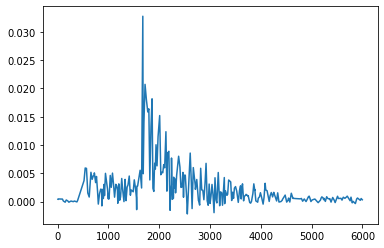